In [1]:
import import_ipynb
import ReadData as RD

importing Jupyter notebook from ReadData.ipynb


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (0,1,5,20,25,26,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [3]:
import numpy as np 
import pandas as pd 
import folium
from folium import plugins
from io import StringIO
import geopandas as gpd
from pprint import pprint 
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from shapely.geometry import Point
import glob
import re
plotly.offline.init_notebook_mode(connected=True)

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
RD.MA_CSV.head()

,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_UNIQUE_IDENTIFIER.1,SUBJECT_GENDER,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_DISTRICT,LOCATION_DISTRICT.1,INCIDENT_DATE,INCIDENT_TIME,SUBJECT_DETAILS,SUBJECT_RACE,SUBJECT_DETAILS.1,SUBJECT_DETAILS.2,UNKNOWN_FIELD_TYPE,UNKNOWN_FIELD_TYPE.1,SEARCH_CONDUCTED,SEARCH_REASON,INCIDENT_REASON,INCIDENT_REASON.1,DISPOSITION,VEHICLE_MAKE,VEHICLE_YEAR,VEHICLE_COLOR,VEHICLE_MODEL,VEHICLE_DETAILS,VEHICLE_DETAILS.1,OFFICER_SUPERVISOR,OFFICER_ID,OFFICER_ASSIGNMENT,OFFICER_ASSIGNMENT.1,OFFICER_ETHNICITY,OFFICER_RACE,OFFICER_AGE,LOCATION_STREET_NUMBER,LOCATION_CITY
0,938283,621880,MALE,NORMANDY ST at SUPPLE RD,B2,3,12/10/13 0:00,12/10/13 0:00,YES,B(Black),"blk jacket, blk shirt, blue jeans, wht sneakers",Med,IOFS,NO,VP,CONSENT SEARCH,INVESTIGATIVE,"DRUGS, INVESTIGATION",SFO,NISSAN,2012,SILVER,max,DRIVER,MA,10132,98656,9999,OTHER,NaN,B(Black),59,3274,NO DATA ENTERED
1,881897,565177,MALE,75 BOYLSTON ST,A1,1,5/24/12 0:00,5/24/12 0:00,NO,W(White),"GRY. SWEATSHIRT, BLUE JEANS",Med,IO,NO,NaN,REASONABLE SUSPICION,RADIO CALL,"DRUGS, POSSESSION",F,NO DATA ENTERED,0,NO DATA ENTERED,NaN,NaN,NO DATA ENTERED,8949,9765,1,A1,NaN,W(White),26,543,OTHER
2,882060,565340,MALE,5 TOPLIFF ST,C11,5,6/4/12 0:00,6/4/12 0:00,YES,B(Black),"GRY SWEATSHIRT, GRY PANTS",Dark,IOF,NO,NaN,NaN,OTHER (SPECIFY),"INVESTIGATE, PERSON",F,NO DATA ENTERED,0,NO DATA ENTERED,NaN,NaN,NO DATA ENTERED,11312,83575,16,YVSF,NaN,B(Black),18,4493,NO DATA ENTERED
3,971623,653895,MALE,170 MORTON ST,B2,3,6/21/14 0:00,6/21/14 0:00,YES,B(Black),"lime green shirt, blue jeans",Med,IOFS,NO,NaN,NaN,INVESTIGATIVE,ABDW,S,NO DATA ENTERED,0,NO DATA ENTERED,NaN,NaN,NO DATA ENTERED,9375,76146,25,BIKE,NaN,B(Black),24,3094,Dorchester
4,882761,566043,MALE,0 ST ALPHONSUS ST,B2,3,12/2/10 0:00,12/2/10 0:00,YES,B(Black),BLU DOWN VEST BLU PANTS,Light,IO,NO,P,REASONABLE SUSPICION,INVESTIGATIVE,VAL,F,SATURN,2001,RED,2DR,NaN,MA,NaN,107106,3,B2,NaN,B(Black),70,4241,Dorchester


In [5]:
RD.MA_SHP.head()

,DISTRICT_I,ID,DISTRICT,SHAPE_area,SHAPE_len,geometry
0,0.0,D14,D14,1.236310e+08,58042.148803,"POLYGON ((761381.3979588002 2953617.032912135,..."
1,0.0,A15,A15,3.798285e+07,57557.005649,"(POLYGON ((771204.100559935 2967616.400093168,..."
2,0.0,A7,A7,1.401151e+08,138468.216239,(POLYGON ((792187.2998114824 2969573.400287002...
3,0.0,A1,A1,4.545927e+07,49109.158160,"POLYGON ((777233.1995735615 2959747.999957845,..."
4,0.0,D4,D4,7.004073e+07,40964.780546,"POLYGON ((774623.0384191275 2950664.443597391,..."


After viewing the columns, LOCATION_DISTRICT of preped .csv file and DISTRICT of shapefile would be ideal common key

Next, We have to Filter out the feature that we'll need from  preped .csv file and clean up noise data

In [6]:
RD.MA_CSV.SUBJECT_GENDER.value_counts()

MALE       134264
FEMALE      17729
UNKNOWN       237
Name: SUBJECT_GENDER, dtype: int64

In [7]:
RD.MA_CSV.SUBJECT_GENDER.replace('UNKNOWN',np.NaN, inplace = True)
RD.MA_CSV.SUBJECT_GENDER.value_counts()

MALE      134264
FEMALE     17729
Name: SUBJECT_GENDER, dtype: int64

In [8]:
RD.MA_CSV.SUBJECT_RACE.value_counts()

B(Black)                                89219
W(White)                                34641
H(Hispanic)                             19891
NO DATA ENTERED                          6073
A(Asian or Pacific Islander)             1301
UNKNOWN                                   574
M(Middle Eastern or East Indian)          462
I(American Indian or Alaskan Native)       69
Name: SUBJECT_RACE, dtype: int64

In [9]:
RD.MA_CSV.SUBJECT_RACE.replace({'B(Black)' : 'black',
                               'W(White)':'white',
                                'H(Hispanic)':'hispanic',
                               'A(Asian or Pacific Islander)' : 'asian',
                               'M(Middle Eastern or East Indian)' : 'mideast_eastind',
                               'I(American Indian or Alaskan Native)' : 'native_indian',
                               'UNKNOWN' : np.NaN,
                               'NO DATA ENTERED' : np.NaN}, inplace = True)
RD.MA_CSV.SUBJECT_RACE.value_counts()


black              89219
white              34641
hispanic           19891
asian               1301
mideast_eastind      462
native_indian         69
Name: SUBJECT_RACE, dtype: int64

Merge shapefiles and police records summarised. 

    geopandas dataframe with CRS set to EPSG:32118. police records summarised by cols_summary passed.  

    EPSG:32118 has base units in meters. It is chooses as we need to calculate area and get % overlap. Area in meter squared are more comprehensible and this is bigger numeric number than area in degrees (when EPSG is choosen with degress as base units). Below website has good informa

In [10]:
t = pd.DataFrame(RD.MA_CSV['LOCATION_DISTRICT'].value_counts().reset_index())
t.columns = ['LOCATION_DISTRICT','total_police_records']
for c in ['SUBJECT_GENDER','SUBJECT_RACE']:
    t1=RD.MA_CSV[['LOCATION_DISTRICT',c]].groupby(by=['LOCATION_DISTRICT',c]).size().reset_index()
    t1 = t1.pivot(index = 'LOCATION_DISTRICT',columns = c,values = 0).reset_index()
    t = t.merge(t1,on = 'LOCATION_DISTRICT',how = 'left')
NEW_SHP = pd.merge(RD.MA_SHP[["DISTRICT",'geometry']], t, left_on = "DISTRICT", right_on = "LOCATION_DISTRICT")
#pg.drop(columns = [pr_common_key],inplace = True)
NEW_SHP = gpd.GeoDataFrame(NEW_SHP,
                    geometry = 'geometry',
                    crs = RD.MA_SHP.crs)
NEW_SHP.fillna(value=0,inplace = True)

In [11]:
NEW_SHP.head()

,DISTRICT,geometry,LOCATION_DISTRICT,total_police_records,FEMALE,MALE,asian,black,hispanic,mideast_eastind,native_indian,white
0,D14,"POLYGON ((761381.3979588002 2953617.032912135,...",D14,2366,335.0,2031.0,33.0,759.0,252.0,20.0,2.0,1183.0
1,A15,"(POLYGON ((771204.100559935 2967616.400093168,...",A15,2035,282.0,1753.0,13.0,556.0,264.0,1.0,0.0,1130.0
2,A7,(POLYGON ((792187.2998114824 2969573.400287002...,A7,5660,713.0,4947.0,34.0,809.0,2326.0,63.0,3.0,2238.0
3,A1,"POLYGON ((777233.1995735615 2959747.999957845,...",A1,15655,2407.0,13247.0,209.0,4980.0,1454.0,129.0,27.0,8253.0
4,D4,"POLYGON ((774623.0384191275 2950664.443597391,...",D4,16927,1925.0,14796.0,106.0,8523.0,2957.0,53.0,16.0,4580.0


Now that we sumerized the data by merging the prepped csv file and shape file we are able to plot the map regarding to crime incident  

In [12]:
def choropleth_map(df, c, bubble = None, fsize = (16,40), lab_title = 'range', color_map = 'Blues',size_divider = 10):
    '''Plot series of choropleths in 2 columns settings. 'quantiles' scheme and cmap = 'Blues' are used.
    Input - df - dataframe.
            c - list of columns to be used for choropleth.
            bubble - column which should be used for plotting bubbles.
            fsize = tupple of fig size.        
    '''
    plt_rows = np.ceil(len(c)/2).astype(int)
    fig, axes = plt.subplots(nrows = plt_rows, ncols =2, sharex = True, sharey = True, figsize = fsize)
    plt.Axes
    i = 0
    for row_ax in axes:
        for ax in row_ax:
            ax.set_axis_off()
            if i < len(df.columns)-3:
                df.plot(ax = ax, column = c[i], legend=True,  cmap = color_map, scheme = 'quantiles',edgecolor = 'black')
                ax.set_title('Map - ' +c[i], fontsize=16)
                ax.get_legend().set_bbox_to_anchor((1.4,1))
                ax.get_legend().set_title(lab_title)
                if(bubble):
                    ax.scatter(x=df['geometry'].centroid.apply(lambda x: Point(x).x),
                            y=df['geometry'].centroid.apply(lambda x: Point(x).y),
                            s = (df[bubble]/size_divider),
                            alpha=0.4,
                            c='red')
                i = i+1
    plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning:

PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



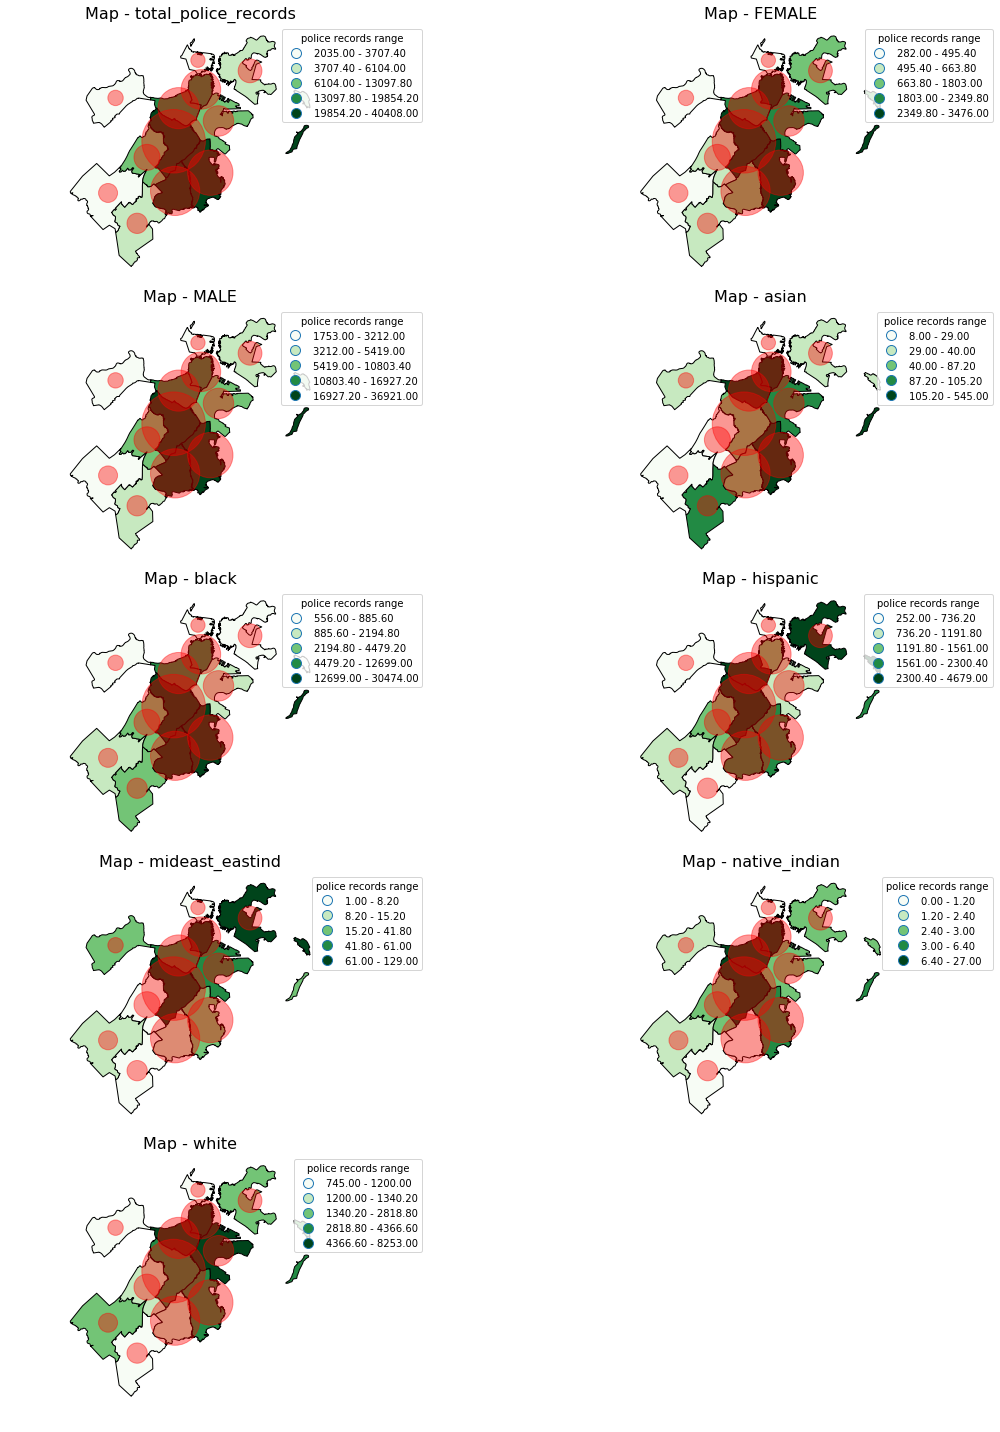

In [13]:
cols = NEW_SHP.iloc[:,3:].columns
choropleth_map(NEW_SHP,
                cols,
               bubble = 'total_police_records',
               lab_title='police records range',
               fsize = (16,20),
               color_map = 'Greens')

We Can also dive into census data. By visualizing the features related to crime incident we will be able to get insight from them.

Also we can see how Census Tracts in ASC files overlap with police district in shapefiles

{'init': 'epsg:4269'}
{'init': 'epsg:2249'}


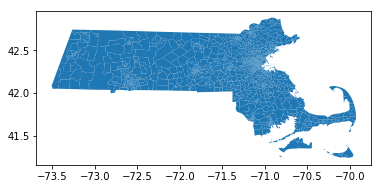

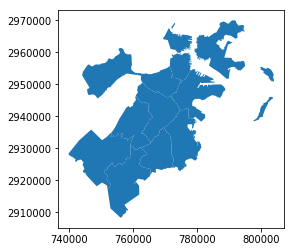

In [14]:
cenesus_tracts_path = './cpe-data/Dept_11-00091/MA_tracts/'
cf_path = glob.glob(cenesus_tracts_path +'*.shp')
census = gpd.read_file(cf_path[0])
print(census.crs)
print(NEW_SHP.crs)
census.plot()
NEW_SHP.plot()

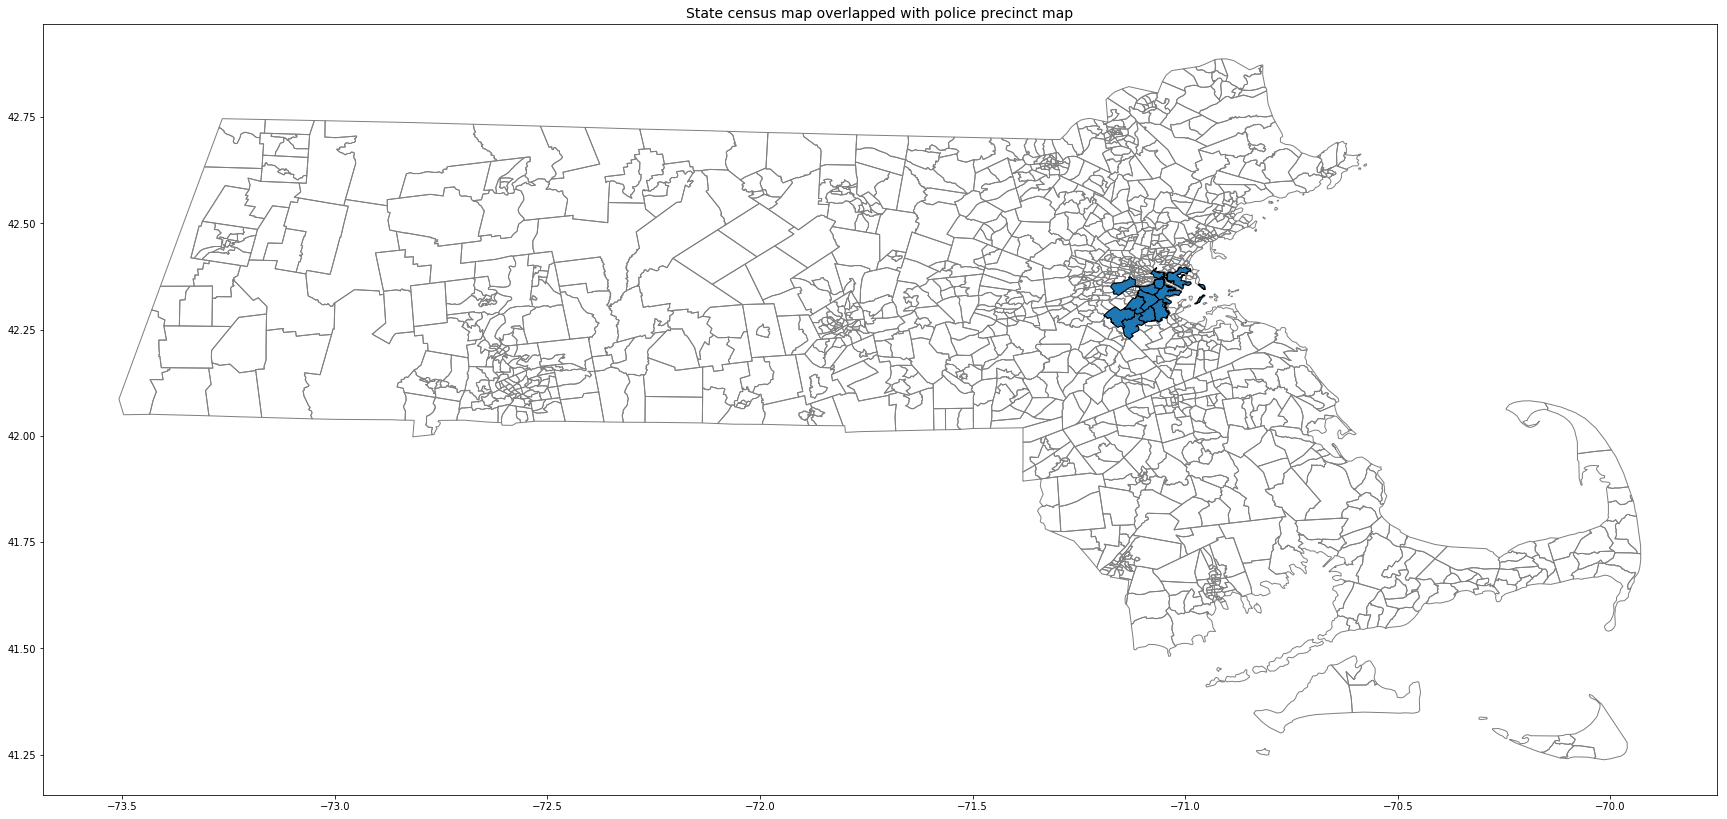

In [15]:
#standalize crs
NEW_SHP = NEW_SHP.to_crs(epsg = '4269')
#Plot overlapping map plot.
ax0 = census.plot(figsize =(30,30), color = 'none', edgecolor = 'grey',)
ax0.set_title('State census map overlapped with police precinct map',fontsize =14)
ax0.set_axis_off
NEW_SHP.plot(ax=ax0, edgecolor ="black")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/geopandas/base.py:29: UserWarning:

GeoSeries crs mismatch: {'init': 'epsg:4269'} and {'init': 'epsg:4269', 'no_defs': True}



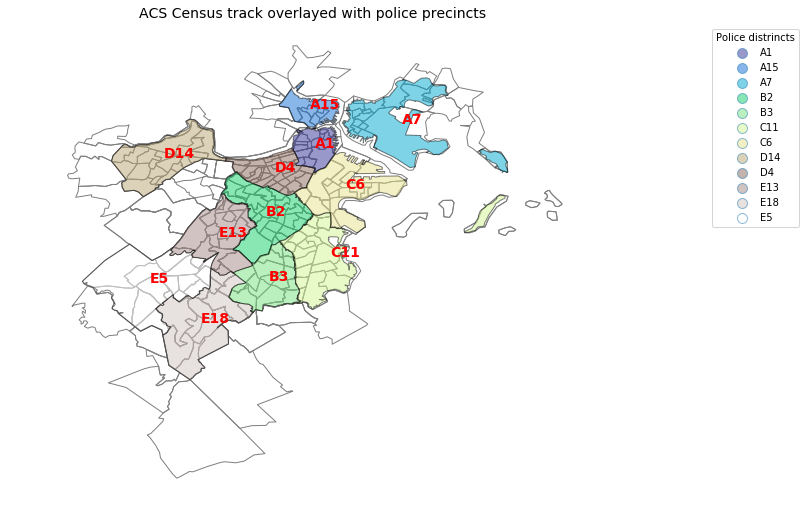

In [16]:
#Calculate area
census['area_acs'] = census['geometry'].area
census = census[['AFFGEOID','geometry','area_acs']]

t = gpd.overlay(census[['AFFGEOID','geometry','area_acs']], 
                NEW_SHP[['DISTRICT','geometry']], 
                how = 'intersection')
t['overlap_area'] = t['geometry'].area
t['percent_share'] = t['overlap_area']/t['area_acs'] *100

t = t.filter(items = ['DISTRICT','AFFGEOID','percent_share']).sort_values(by = ['DISTRICT','AFFGEOID']).reset_index(drop=True)
t1 = pd.merge(t, census,on = 'AFFGEOID',how = 'left')
ax1 = t1.plot(figsize = (12,12), facecolor = 'None', edgecolor = 'grey')
NEW_SHP.plot(ax=ax1, column = 'DISTRICT', alpha = 0.5, edgecolor = 'black',legend = True, cmap = 'terrain')
ax1.set_title('ACS Census track overlayed with police precincts ', fontsize = 14)
ax1.set_axis_off()
ax1.get_legend().set_title('Police distrincts')
ax1.get_legend().set_bbox_to_anchor((1.4,1))
for i, pp in enumerate(NEW_SHP['DISTRICT']):
        ax1.annotate(pp,
                    (NEW_SHP.geometry[i].centroid.x, NEW_SHP.geometry[i].centroid.y),
                   fontsize =14, color = 'r', weight = 'bold')
plt.tight_layout()

In [118]:
t.head()

,DISTRICT,AFFGEOID,percent_share
0,A1,1400000US25017352101,0.008334
1,A1,1400000US25017352102,0.008486
2,A1,1400000US25025010702,0.123796
3,A1,1400000US25025020101,95.334484
4,A1,1400000US25025020200,100.000000


In [112]:
acs_ea = RD.MA_Education
acs_ea_total_pop = pd.DataFrame()
acs_ea_total_pop['Id'] =  acs_ea['Id']
#acs_ea_total_pop['ea_pop_above_18'] =  acs_ea['HC01_EST_VC02'] + acs_ea['HC01_EST_VC08']
acs_ea_total_pop['ea_pop_less_than_highschool'] =  acs_ea['Total; Estimate; Population 18 to 24 years - Less than high school graduate'].convert_objects(convert_numeric=True) + acs_ea['Total; Estimate; Population 25 years and over - Less than 9th grade'].convert_objects(convert_numeric=True) + acs_ea['Total; Estimate; Population 25 years and over - 9th to 12th grade, no diploma'].convert_objects(convert_numeric=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [113]:
acs_emp = RD.MA_Employment
acs_emp_total_pop = pd.DataFrame()
acs_emp['Employment/Population Ratio; Estimate; Population 16 years and over'] = acs_emp['Employment/Population Ratio; Estimate; Population 16 years and over'].convert_objects(convert_numeric=True)
acs_emp_total_pop['Id'] =  acs_emp['Id']
#acs_emp_total_pop['emp_pop_above_16'] =  acs_emp['HC01_EST_VC01']
acs_emp_total_pop['emp_pop_employed'] =  acs_emp['Employment/Population Ratio; Estimate; Population 16 years and over']/100*acs_emp['Total; Estimate; Population 16 years and over'].convert_objects(convert_numeric=True)
acs_emp_total_pop['emp_pop_unemployed'] = acs_emp['Unemployment rate; Estimate; Population 16 years and over'].convert_objects(convert_numeric=True)/100*acs_emp['Total; Estimate; Population 16 years and over'].convert_objects(convert_numeric=True)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd

In [114]:
acs_pov = RD.MA_Poverty
acs_pov_total_pop = pd.DataFrame()
acs_pov_total_pop['Id'] =  acs_pov['Id']
acs_pov_total_pop['pov_below_poverty'] =  acs_pov['Below poverty level; Estimate; Population for whom poverty status is determined']

In [115]:
acs_rsa = RD.MA_AgeRaceSex
acs_rsa_total_pop = pd.DataFrame()
acs_rsa_total_pop['Id'] =  acs_rsa['Id']
acs_rsa_total_pop['rsa_total_pop'] =  acs_rsa['Estimate; SEX AND AGE - Total population']
acs_rsa_total_pop['rsa_male_pop'] =  acs_rsa['Estimate; SEX AND AGE - Total population - Male']
acs_rsa_total_pop['rsa_female_pop'] =  acs_rsa['Estimate; SEX AND AGE - Total population - Female']
acs_rsa_total_pop['rsa_age_upto14_pop'] =  acs_rsa['Estimate; SEX AND AGE - Under 5 years'].convert_objects(convert_numeric=True) + acs_rsa['Estimate; SEX AND AGE - 5 to 9 years'].convert_objects(convert_numeric=True) + acs_rsa['Estimate; SEX AND AGE - 10 to 14 years'].convert_objects(convert_numeric=True)
acs_rsa_total_pop['rsa_age_above_65_pop'] =  acs_rsa['Estimate; SEX AND AGE - 65 years and over'].iloc[:,0]
acs_rsa_total_pop['rsa_age_15_64_pop'] =  acs_rsa_total_pop['rsa_total_pop'].convert_objects(convert_numeric=True) - acs_rsa_total_pop['rsa_age_upto14_pop'].convert_objects(convert_numeric=True) - acs_rsa_total_pop['rsa_age_above_65_pop'].convert_objects(convert_numeric=True)
#acs_rsa_total_pop['rsa_one_race_pop'] =  acs_rsa['HC01_VC44']
acs_rsa_total_pop['rsa_white_race_pop'] =  acs_rsa['Estimate; RACE - One race - White']
acs_rsa_total_pop['rsa_black_race_pop'] =  acs_rsa['Estimate; RACE - One race - Black or African American']
acs_rsa_total_pop['rsa_ameindia_race_pop'] =  acs_rsa['Estimate; RACE - One race - American Indian and Alaska Native']
acs_rsa_total_pop['rsa_asian_race_pop'] =  acs_rsa['Estimate; RACE - One race - Asian']
acs_rsa_total_pop['rsa_Hawaiian_race_pop'] =  acs_rsa['Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander']
acs_rsa_total_pop['rsa_latino_race_pop'] =  acs_rsa['Estimate; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)']
acs_rsa_total_pop['rsa_other_race_pop'] =  acs_rsa['Estimate; RACE - One race - Some other race']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [116]:
acs_total_pop = pd.merge(acs_rsa_total_pop, 
             acs_pov_total_pop, 
             on = 'Id', 
             how = 'left').merge(acs_emp_total_pop,
                                  on = 'Id',
                                  how = 'left').merge(acs_ea_total_pop,
                                                      on = 'Id',
                                                      how = 'left')

In [117]:
acs_total_pop.head()

,Id,rsa_total_pop,rsa_male_pop,rsa_female_pop,rsa_age_upto14_pop,rsa_age_above_65_pop,rsa_age_15_64_pop,rsa_white_race_pop,rsa_black_race_pop,rsa_ameindia_race_pop,rsa_asian_race_pop,rsa_Hawaiian_race_pop,rsa_latino_race_pop,rsa_other_race_pop,pov_below_poverty,emp_pop_employed,emp_pop_unemployed,ea_pop_less_than_highschool
0,1400000US25025000100,3671,1827,1844,437,416,2818,2348,178,0,531,0,694,556,646,2057.460,352.980,479
1,1400000US25025000201,3284,1494,1790,216,313,2755,2729,143,0,200,0,299,106,451,2199.756,85.904,230
2,1400000US25025000202,3587,1737,1850,507,404,2676,2342,365,0,550,0,666,295,752,1986.348,254.660,269
3,1400000US25025000301,2712,1411,1301,406,262,2044,2146,50,0,362,0,226,154,463,1582.515,45.540,214
4,1400000US25025000302,2880,1182,1698,310,352,2218,2185,149,0,408,0,126,91,523,1651.200,35.840,186


ACS survey data is extracted and computed for analsysis. In abvoe steps we had police records by police disticts calculated and also overlap of ACS tracks with police districts. Now the time merge these 2 together to get ACS and police records data by police district.

In [132]:
pp_census_overlap = t
common_key = 'DISTRICT'

pp_acs_total_pop = pp_census_overlap.merge(acs_total_pop,left_on = 'AFFGEOID', right_on = 'Id', how = 'inner')
for c in pp_acs_total_pop.iloc[:,4:].columns:
    pp_acs_total_pop[c] = pp_acs_total_pop[c].convert_objects(convert_numeric=True) * pp_acs_total_pop['percent_share']

pp_acs_total_pop = pp_acs_total_pop.drop(columns = ['AFFGEOID','percent_share','Id']).groupby(by = common_key).sum().reset_index()
pp_acs_total_pop.head()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



,DISTRICT,rsa_total_pop,rsa_male_pop,rsa_female_pop,rsa_age_upto14_pop,rsa_age_above_65_pop,rsa_age_15_64_pop,rsa_white_race_pop,rsa_black_race_pop,rsa_ameindia_race_pop,rsa_asian_race_pop,rsa_Hawaiian_race_pop,rsa_latino_race_pop,rsa_other_race_pop,pov_below_poverty,emp_pop_employed,emp_pop_unemployed,ea_pop_less_than_highschool
0,A1,3.949456e+06,1.978158e+06,1.971299e+06,2.775533e+05,525692.130880,3.146211e+06,2.960317e+06,1.074014e+05,2260.547122,726269.522271,0.000000,2.412909e+05,6.864019e+04,5.819253e+05,2.484035e+06,193515.687043,3.264081e+05
1,A15,1.495505e+06,6.714347e+05,8.240703e+05,2.926357e+05,140890.151173,1.061979e+06,1.118824e+06,1.566495e+05,0.000000,121685.025325,0.000000,1.535643e+05,6.349507e+04,3.000054e+05,8.568430e+05,77159.724124,1.064245e+05
2,A7,3.581530e+06,1.966302e+06,1.615229e+06,6.280064e+05,294457.189357,2.659067e+06,2.237906e+06,1.082844e+05,30848.012399,114575.782376,0.000000,2.139303e+06,1.747794e+05,6.913247e+05,2.041474e+06,268337.086204,9.121729e+05
3,B2,7.383769e+06,3.450493e+06,3.933276e+06,1.232888e+06,680753.394182,5.470128e+06,2.008903e+06,3.473279e+06,33065.045958,467528.525480,2321.672448,1.796040e+06,1.121894e+06,2.395028e+06,3.133010e+06,816283.227245,1.064415e+06
4,B3,5.375087e+06,2.520250e+06,2.854837e+06,1.074379e+06,577071.295814,3.723637e+06,5.760527e+05,4.309373e+06,31346.115138,130949.778751,0.000000,9.787190e+05,1.999096e+05,1.299276e+06,2.432431e+06,619123.964703,8.887236e+05


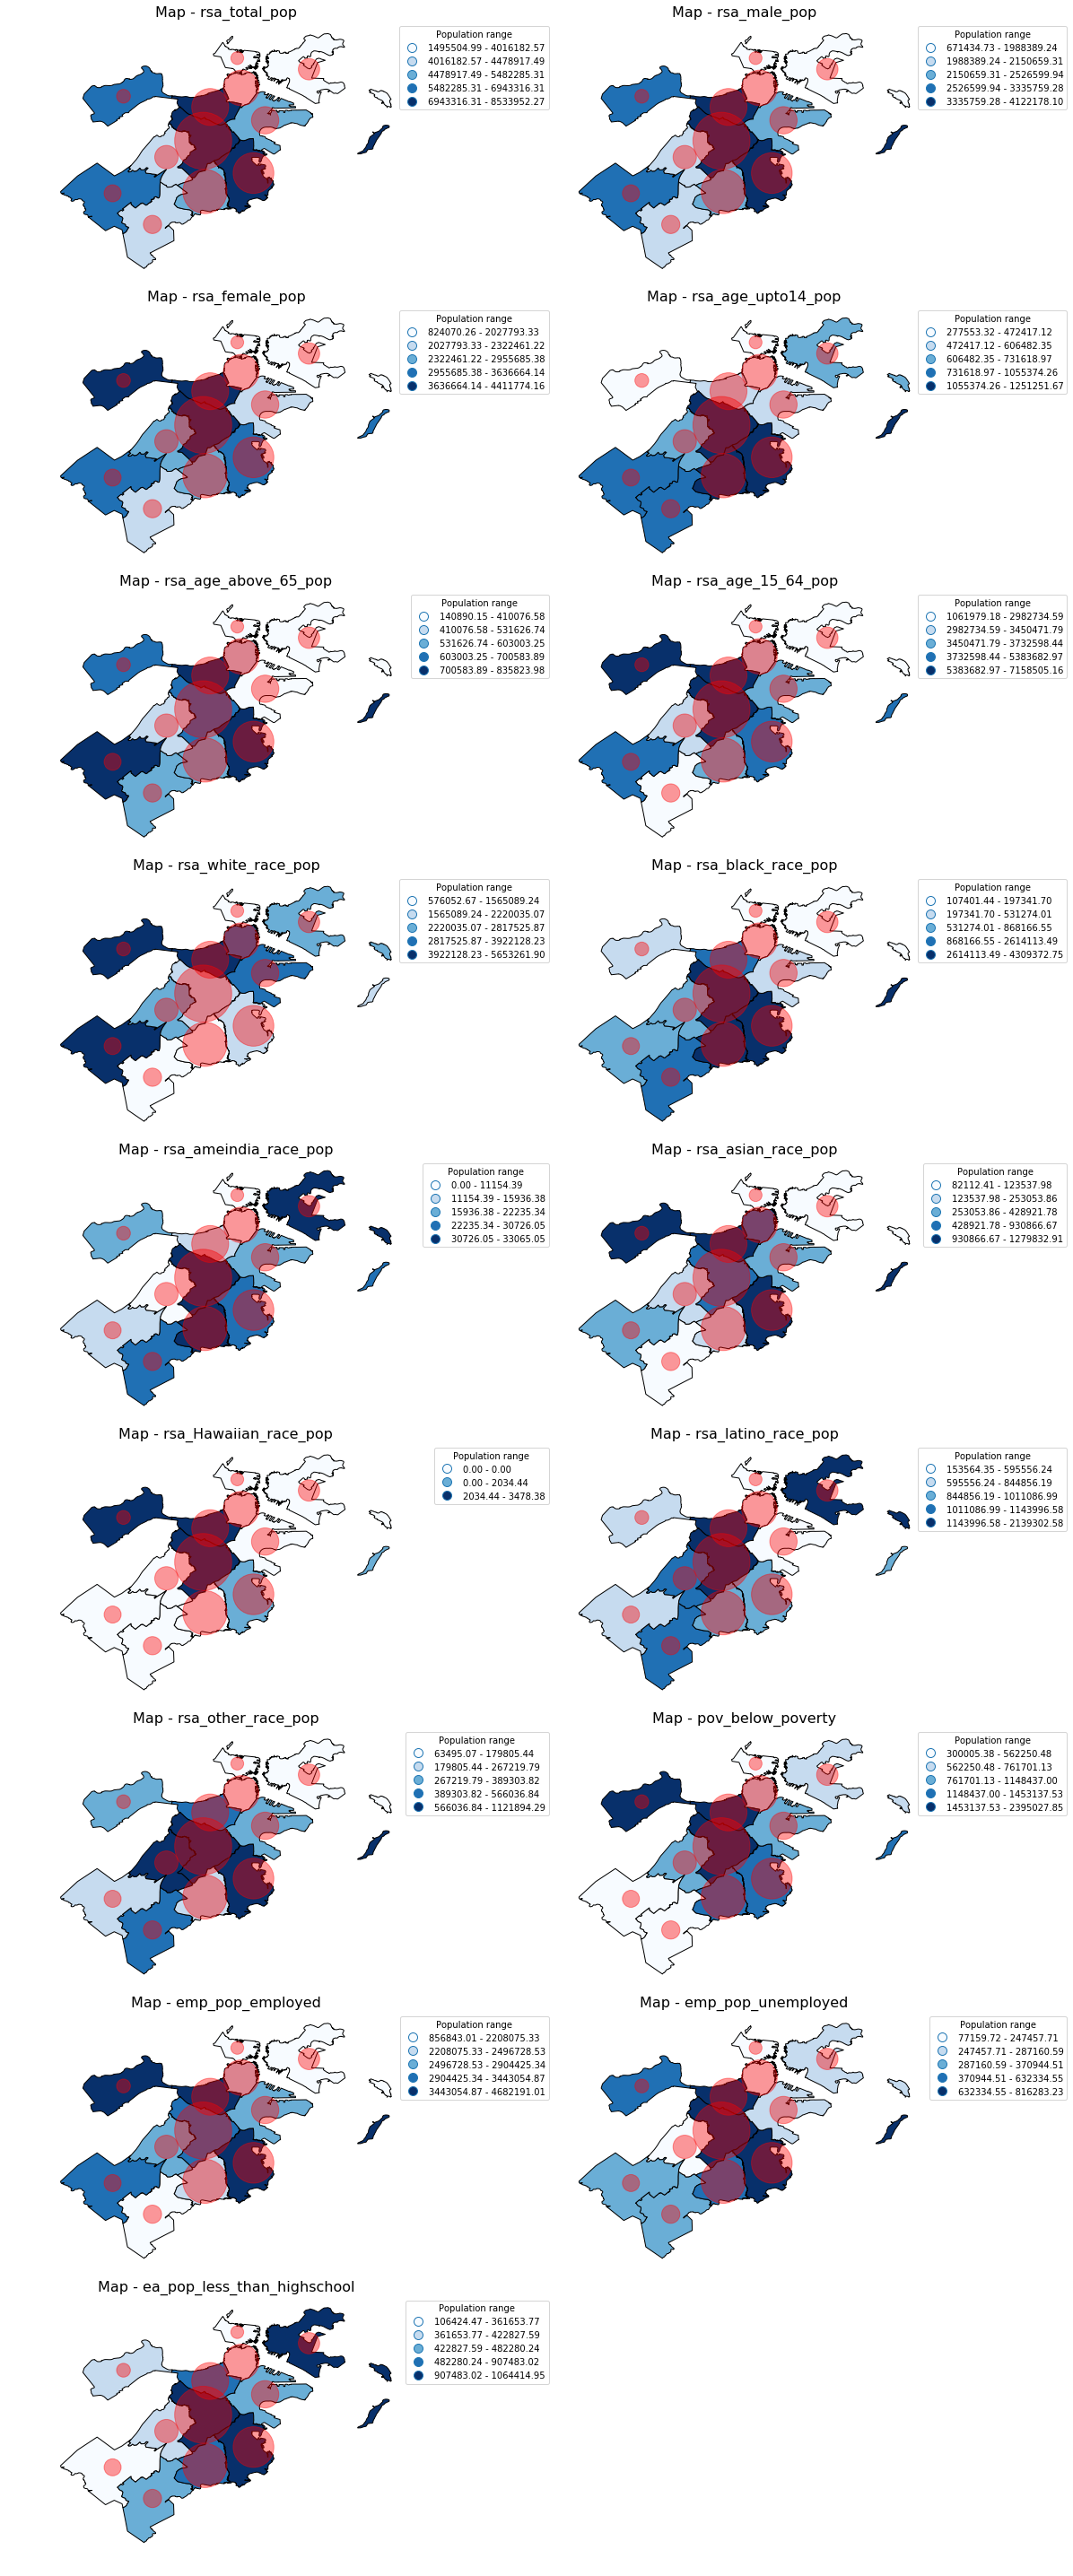

In [133]:
crimes_by_precinct = NEW_SHP
common_key = 'DISTRICT'
size_divider = 10

crimes_pp_total_pop = crimes_by_precinct[[common_key,
                                        'geometry',
                                        'total_police_records']].merge(pp_acs_total_pop, 
                                                                             on = common_key,
                                                                             how = 'left')
col_series = crimes_pp_total_pop.iloc[:,3:].columns
choropleth_map(crimes_pp_total_pop,
                col_series,
                bubble = 'total_police_records',
                lab_title='Population range',
                size_divider = size_divider)


plot the corrlation between total police records and census data, to see how reported crime inrelated to race, poverty, and other features

Text(0.5, 1.0, 'Correlation chart of ACS data and total police records')

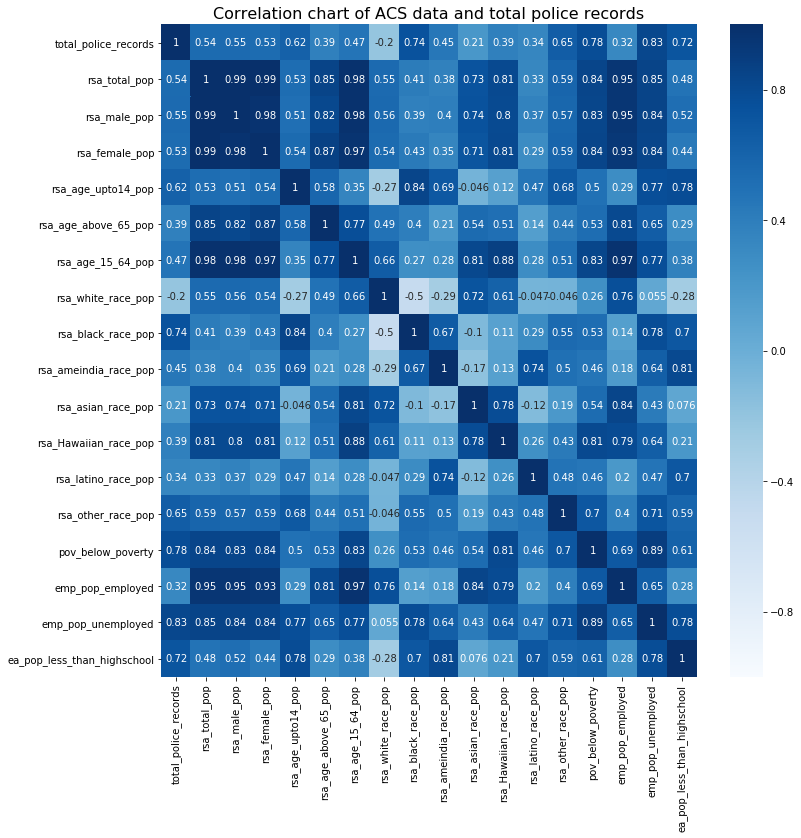

In [134]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(crimes_pp_total_pop.corr(),vmin=-1,vmax=1,annot = True,cmap = 'Blues',ax = ax)
plt.title('Correlation chart of ACS data and total police records', fontsize=16)

In [24]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
RD.MA_AgeRaceSex.head()

,Id,Id2,Geography,Estimate; SEX AND AGE - Total population,Margin of Error; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Percent Margin of Error; SEX AND AGE - Total population,Estimate; SEX AND AGE - Total population - Male,Margin of Error; SEX AND AGE - Total population - Male,Percent; SEX AND AGE - Total population - Male,Percent Margin of Error; SEX AND AGE - Total population - Male,Estimate; SEX AND AGE - Total population - Female,Margin of Error; SEX AND AGE - Total population - Female,Percent; SEX AND AGE - Total population - Female,Percent Margin of Error; SEX AND AGE - Total population - Female,Estimate; SEX AND AGE - Under 5 years,Margin of Error; SEX AND AGE - Under 5 years,Percent; SEX AND AGE - Under 5 years,Percent Margin of Error; SEX AND AGE - Under 5 years,Estimate; SEX AND AGE - 5 to 9 years,Margin of Error; SEX AND AGE - 5 to 9 years,Percent; SEX AND AGE - 5 to 9 years,Percent Margin of Error; SEX AND AGE - 5 to 9 years,Estimate; SEX AND AGE - 10 to 14 years,Margin of Error; SEX AND AGE - 10 to 14 years,Percent; SEX AND AGE - 10 to 14 years,Percent Margin of Error; SEX AND AGE - 10 to 14 years,Estimate; SEX AND AGE - 15 to 19 years,Margin of Error; SEX AND AGE - 15 to 19 years,Percent; SEX AND AGE - 15 to 19 years,Percent Margin of Error; SEX AND AGE - 15 to 19 years,Estimate; SEX AND AGE - 20 to 24 years,Margin of Error; SEX AND AGE - 20 to 24 years,Percent; SEX AND AGE - 20 to 24 years,Percent Margin of Error; SEX AND AGE - 20 to 24 years,Estimate; SEX AND AGE - 25 to 34 years,Margin of Error; SEX AND AGE - 25 to 34 years,Percent; SEX AND AGE - 25 to 34 years,Percent Margin of Error; SEX AND AGE - 25 to 34 years,Estimate; SEX AND AGE - 35 to 44 years,Margin of Error; SEX AND AGE - 35 to 44 years,Percent; SEX AND AGE - 35 to 44 years,Percent Margin of Error; SEX AND AGE - 35 to 44 years,Estimate; SEX AND AGE - 45 to 54 years,Margin of Error; SEX AND AGE - 45 to 54 years,Percent; SEX AND AGE - 45 to 54 years,Percent Margin of Error; SEX AND AGE - 45 to 54 years,Estimate; SEX AND AGE - 55 to 59 years,Margin of Error; SEX AND AGE - 55 to 59 years,Percent; SEX AND AGE - 55 to 59 years,Percent Margin of Error; SEX AND AGE - 55 to 59 years,Estimate; SEX AND AGE - 60 to 64 years,Margin of Error; SEX AND AGE - 60 to 64 years,Percent; SEX AND AGE - 60 to 64 years,Percent Margin of Error; SEX AND AGE - 60 to 64 years,Estimate; SEX AND AGE - 65 to 74 years,Margin of Error; SEX AND AGE - 65 to 74 years,Percent; SEX AND AGE - 65 to 74 years,Percent Margin of Error; SEX AND AGE - 65 to 74 years,Estimate; SEX AND AGE - 75 to 84 years,Margin of Error; SEX AND AGE - 75 to 84 years,Percent; SEX AND AGE - 75 to 84 years,Percent Margin of Error; SEX AND AGE - 75 to 84 years,Estimate; SEX AND AGE - 85 years and over,Margin of Error; SEX AND AGE - 85 years and over,Percent; SEX AND AGE - 85 years and over,Percent Margin of Error; SEX AND AGE - 85 years and over,Estimate; SEX AND AGE - Median age (years),Margin of Error; SEX AND AGE - Median age (years),Percent; SEX AND AGE - Median age (years),Percent Margin of Error; SEX AND AGE - Median age (years),Estimate; SEX AND AGE - 18 years and over,Margin of Error; SEX AND AGE - 18 years and over,Percent; SEX AND AGE - 18 years and over,Percent Margin of Error; SEX AND AGE - 18 years and over,Estimate; SEX AND AGE - 21 years and over,Margin of Error; SEX AND AGE - 21 years and over,Percent; SEX AND AGE - 21 years and over,Percent Margin of Error; SEX AND AGE - 21 years and over,Estimate; SEX AND AGE - 62 years and over,Margin of Error; SEX AND AGE - 62 years and over,Percent; SEX AND AGE - 62 years and over,Percent Margin of Error; SEX AND AGE - 62 years and over,Estimate; SEX AND AGE - 65 years and over,Margin of Error; SEX AND AGE - 65 years and over,Percent; SEX AND AGE - 65 years and over,Percent Margin of Error; SEX AND AGE - 65 years and over,Estimate; SEX AND AGE - 18 years and over,Margin of Error; SEX AND AGE - 18 years and over,Percent; SEX AND AGE -

In [ ]:
total_population = RD.MA_AgeRaceSex["Estimate; SEX AND AGE - Total population"]

trace = go.Histogram(x=total_population, marker=dict(color='orange', opacity=0.6))
layout = dict(title="Total Population Distribution In Massachusetts - Across the Census Tracts", margin=dict(l=200), width=800, height=400)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
male_pop = RD.MA_AgeRaceSex["Estimate; SEX AND AGE - Total population - Male"]
female_pop = RD.MA_AgeRaceSex["Estimate; SEX AND AGE - Total population - Female"]
Census_Tracts = RD.MA_AgeRaceSex["Geography"].apply(lambda x : x.replace(", Suffolk County, Massachusetts", "").replace("Census Tract ", "CT: "))

trace1 = go.Bar(x = Census_Tracts, y=male_pop, name="male population", marker=dict(color='blue', opacity=0.6))
trace2 = go.Bar(x = Census_Tracts, y=female_pop, name="female population", marker=dict(color='pink', opacity=0.6))

layout = go.Layout(title="Population Distribution Breakdown - Across the Census Tracts",
                yaxis=dict(title='Male or Female Population'),
                   width=1200, height=400)
data = [trace1, trace2]
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
single_race_df = RD.MA_AgeRaceSex[["Estimate; RACE - One race - White", 
                         "Estimate; RACE - One race - Black or African American", 
                         "Estimate; RACE - One race - American Indian and Alaska Native", 
                         "Estimate; RACE - One race - Asian", 
                         "Estimate; RACE - One race - Some other race", 
                         "Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander",
                        ]]

traces = []
for i, col in enumerate(single_race_df.columns):
    nm = col.replace("Estimate; RACE - One race - ", "")
    trace = go.Bar(x=Census_Tracts, y=single_race_df[col], name=nm, marker=dict(opacity=0.6))
    traces.append(trace)
    
layout = dict(barmode="stack", title="Population Breakdown by Race (Single)", margin=dict(b=150), height=600, legend=dict(x=-0.1, y=1, orientation="h"))
fig = go.Figure(data=traces, layout=layout)
iplot(fig)

We can see that majority wise White or Black American population exists. 
It will be interesting to look at which ones are the dominating other races. 
Lets remove white and black population and plot again

In [ ]:
single_race_df = RD.MA_AgeRaceSex[["Estimate; RACE - One race - American Indian and Alaska Native", 
                         "Estimate; RACE - One race - Asian", 
                         "Estimate; RACE - One race - Some other race", 
                         "Estimate; RACE - One race - Native Hawaiian and Other Pacific Islander",
                        ]]

traces = []
for i, col in enumerate(single_race_df.columns):
    nm = col.replace("Estimate; RACE - One race - ", "")
    trace = go.Bar(x=Census_Tracts, y=single_race_df[col], name=nm, marker=dict(opacity=0.6))
    traces.append(trace)
    
layout = dict(barmode="stack", title="Population Breakdown by Race (Single)", margin=dict(b=150), height=600, legend=dict(x=-0.1, y=1, orientation="h"))
fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [ ]:
age_df = RD.MA_AgeRaceSex[["Estimate; SEX AND AGE - Under 5 years", 
                         "Estimate; SEX AND AGE - 5 to 9 years", 
                         "Estimate; SEX AND AGE - 10 to 14 years", 
                         "Estimate; SEX AND AGE - 15 to 19 years", 
                         "Estimate; SEX AND AGE - 20 to 24 years", 
                         "Estimate; SEX AND AGE - 25 to 34 years",
                         "Estimate; SEX AND AGE - 35 to 44 years",
                         "Estimate; SEX AND AGE - 45 to 54 years",
                         "Estimate; SEX AND AGE - 55 to 59 years",
                         "Estimate; SEX AND AGE - 60 to 64 years",
                         "Estimate; SEX AND AGE - 65 years and over",
                        ]]

traces = []
for i, col in enumerate(age_df.columns):
    nm = col.replace("Estimate; SEX AND AGE -", "")
    trace = go.Bar(x=Census_Tracts, y=age_df[col], name=nm, marker=dict(opacity=0.6))
    traces.append(trace)
    
layout = dict(barmode="stack", title="Population Breakdown by Age ", margin=dict(b=150), height=1400, legend=dict(x=-0.1, y=1, orientation="h"))
fig = go.Figure(data=traces, layout=layout)
iplot(fig)